# 모두를 위한 딥러닝 tensorflow

In [4]:
##Hello Tensorflow

In [16]:
import tensorflow as tf
hello = tf.constant("Hello,Tensorflow!")
sess = tf.Session()
print(sess.run(hello))

b'Hello,Tensorflow!'


# 01) Computational Graph

(1) Build graph(tensors) using TensorFlow operations

In [7]:
node1 = tf.constant(3.0, tf.float32) #넣을내용,데이터형식
node2 = tf.constant(4.0) #also tf.float32 implicitly
node3 = tf.add(node1,node2) #node3 = node1 + node2도 가능

In [8]:
print("node1:", node2, "node2:", node2)
print("node3:", node3)

node1: Tensor("Const_3:0", shape=(), dtype=float32) node2: Tensor("Const_3:0", shape=(), dtype=float32)
node3: Tensor("Add:0", shape=(), dtype=float32)


(2) feed data and run graph (operation)
    sess.run(op)

(3) update variables in the graph
    (and return values)

In [17]:
sess = tf.Session()
print("sess.run([node1,node2]): ",sess.run([node1,node2]))
print("sess.run(node3): ",sess.run(node3))

sess.run([node1,node2]):  [3.0, 4.0]
sess.run(node3):  7.0


### Placeholder (like input)

placeholder로 미지수로 남기고, feed_dict로 넣어줌. n개 가능

In [19]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a+b #tf.add(a,b)도 가능

print(sess.run(adder_node, feed_dict={a:3,b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


### Tensor Ranks, Shpaes and Types

Rank / Mateh entity / Python example

    0 / Scalar(magnitude only) / s = 483
    1 / Vector(magnitude and directioni) / v = [1.2, 3.3, 4.3]
    2 / Matrix(table of numbers) / m = [[1,2], [5,6], [7,3]]
    3 / 3-Tensor(cube of numbers) t = [[[2],[3],[4]],[[5],[6],[7]],[[8],[9],[10]]]
    n / n-Tensor

# 02) Linear regression 구현

### (1) Build graph using TF operations
H(x) = Wx+b

In [20]:
x = [1,2,3]
y = [1,2,3]

#tt.Variable = TF가 학습하는 과정에서 변경시키는 v이다.
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
#our hypothesis Wx+b
hypothesis = w*x + b

cost(W,b) = 1/m (시그마 i=1~m : (H(xi)-yi)^2)

In [21]:
#tf.reduce_mean: 평균 값을 구해줌
#tf.square: 제곱
cost = tf.reduce_mean(tf.square(hypothesis - y))

GradientDescent (경사하강법)로 cost 최소값 구하기

In [22]:
optimizer =  tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

### (2),(3) Run/Update graph and get results

In [28]:
sess =tf.Session()
#tf.variable을 사용할 경우 run전에 tf.global_variables_initializer()를 사용해야함
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train)
    if step % 100 == 0:
        print(step, sess.run(cost), sess.run(w), sess.run(b))

0 None 15.762543 [-1.9815823] [2.8269267]
100 None 1.0607485 [-0.19620547] [2.719229]
200 None 0.6523307 [0.06194156] [2.132427]
300 None 0.401165 [0.26437336] [1.6722523]
400 None 0.24670522 [0.4231205] [1.3113828]
500 None 0.15171678 [0.5476103] [1.0283883]
600 None 0.093301594 [0.6452353] [0.8064636]
700 None 0.057377815 [0.72179306] [0.6324298]
800 None 0.035285737 [0.7818297] [0.4959523]
900 None 0.021699736 [0.8289106] [0.38892657]
1000 None 0.01334473 [0.8658314] [0.3049967]
1100 None 0.00820664 [0.8947848] [0.23917891]
1200 None 0.005046841 [0.9174901] [0.18756437]
1300 None 0.0031036653 [0.9352957] [0.14708824]
1400 None 0.0019086679 [0.9492586] [0.11534683]
1500 None 0.0011737797 [0.96020865] [0.09045516]
1600 None 0.0007218362 [0.9687956] [0.07093499]
1700 None 0.0004439084 [0.9755295] [0.05562723]
1800 None 0.00027299262 [0.9808102] [0.04362299]
1900 None 0.00016788131 [0.9849513] [0.03420916]
2000 None 0.00010324144 [0.9881988] [0.02682685]


### Full code with placeholders

In [47]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
x = tf.placeholder(tf.float32, shape = [None])
y = tf.placeholder(tf.float32, shape = [None])

hy = w*x+b
cost = tf.reduce_mean(tf.square(hy-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, w_val, b_val, _ = sess.run([cost, w, b, train], feed_dict={x:[1,2,3,4], y:[2.1,3.1,4.1,5.1]})
    if step %200==0:
        print(step,cost_val,w_val,b_val)
        
print(sess.run(hy, feed_dict={x: [5]}))
print(sess.run(hy, feed_dict={x: [2.5]}))

0 3.0342264 [0.7811154] [0.20755665]
200 0.027220666 [1.1369014] [0.6974932]
400 0.008203988 [1.0751572] [0.87902856]
600 0.0024725902 [1.0412605] [0.9786892]
800 0.00074520375 [1.0226514] [1.0334018]
1000 0.00022459036 [1.0124351] [1.0634389]
1200 6.769014e-05 [1.0068269] [1.0799282]
1400 2.0401305e-05 [1.0037479] [1.0889806]
1600 6.148981e-06 [1.0020576] [1.0939503]
1800 1.853588e-06 [1.0011296] [1.0966785]
2000 5.5907356e-07 [1.0006204] [1.0981758]
[6.1012774]
[3.5997267]


# 03) Linear Regression의 cost 최소화 구현

### cost함수 그리기

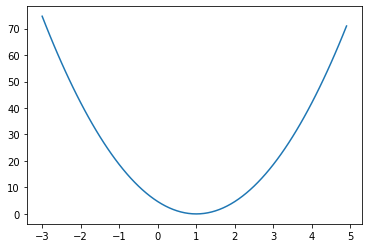

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=[1,2,3]
y=[1,2,3]
w=tf.placeholder(tf.float32)
hypothesis = w*x

cost = tf.reduce_mean(tf.square(hypothesis-y))
sess=tf.Session()
sess.run(tf.global_variables_initializer())

w_val=[]
cost_val=[]
for i in range(-30,50):
    feed_w = i*0.1
    curr_cost, curr_w = sess.run([cost,w], feed_dict = {w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)
    
#show the cost function
plt.plot(w_val, cost_val)
plt.show()

### cost함수 미분하기
    위의 cost function에서 gradient descent를 활용하여 미분하기
    cost(w)를 미분했을 때 양/음 값이 나오면 w값을 -/+조절하는 함수 만들기

In [ ]:
#Minimize: Gradient Descent using derivative(미분):
#w -= Learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((w*x-y)*x)
descent = w - learning_rate * gradient
update = w.assign(descent)

## full code

In [77]:
import tensorflow as tf
x_data=[1,2,3]
y_data=[1,2,3]

w=tf.Variable(tf.random_normal([1]), name = 'weight')
x=tf.placeholder(tf.float32, shape=[None])
y=tf.placeholder(tf.float32, shape=[None])
hy=w*x
cost = tf.reduce_mean(tf.square(hy-y))

#이 부분이
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#train = optimizer.minimize(cost)
#로 대체할 수 있는 것
learning_rate = 0.1
gradient = tf.reduce_mean((w*x-y)*x)
descent = w - learning_rate * gradient
update = w.assign(descent)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={x:x_data,y:y_data})
    print(step, sess.run(cost,feed_dict={x:x_data,y:y_data}), sess.run(w))

SyntaxError: invalid syntax (<ipython-input-77-e016a020bed2>, line 12)

# 04-1) multi-variable linear regression 구현

### Matrix (X)

In [68]:
import tensorflow as tf

#여기부터
x1_data = [73,93, 89, 96, 73]
x2_data = [80, 88, 91, 98, 66]
x3_data = [75, 93, 90, 100, 70]
y_data = [152, 185, 180, 196, 142]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
#여기까지 매트리스로 구현 가능

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1*w1 + x2*w2 + x3*w3 +b

cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x1: x1_data, x2:x2_data, x3: x3_data, y: y_data})
    if step % 1000 == 0:
        print(step, "cost:", cost_val, "\nprediction:\n", hy_val, "\n")

0 cost: 6857.9805 
prediction:
 [230.88612 268.25198 268.94876 295.0552  200.41382] 

1000 cost: 19.456238 
prediction:
 [155.80194 181.36035 181.5949  200.04129 134.87935] 

2000 cost: 12.462451 
prediction:
 [154.45819 182.28967 181.19348 199.67053 136.16678] 



### Matrix (0)

In [76]:
import tensorflow as tf

x_data = [[73,80,75],[93,88,93],[89,91,90],[96,98,100],[73,66,70]]
y_data = [[152], [185], [180], [196], [142]]

x = tf.placeholder(tf.float32, shape=[None,3])
y = tf.placeholder(tf.float32, shape=[None,1])

#w는 normal([들어오는 값,나가는 값])
#b는 nomal([나가는 값])
w = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(x,w)+b

cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x: x_data, y: y_data})
    if step % 1000 == 0:
        print(step, "cost:", cost_val, "\nprediction:\n", hy_val, "\n")

0 cost: 12.730005 
prediction:
 [[151.74472]
 [189.52249]
 [183.12512]
 [198.33475]
 [147.28342]] 

1000 cost: 2.383389 
prediction:
 [[149.75215]
 [185.91283]
 [180.19905]
 [195.09326]
 [144.27356]] 

2000 cost: 1.4940068 
prediction:
 [[150.24074]
 [185.57631]
 [180.3467 ]
 [195.21582]
 [143.81873]] 



# 04-2) 파일에서 데이터 읽어오기

In [18]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
#print(x_data.shape, "\n", x_data, len(x_data))
#print(y_data.shape, "\n", y_data, len(y_data))

In [19]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

x = tf.placeholder(tf.float32, shape=[None,3])
y = tf.placeholder(tf.float32, shape=[None,1])

#w는 normal([들어오는 값,나가는 값])
#b는 nomal([나가는 값])
w = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(x,w)+b

cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x: x_data, y: y_data})
    #if step % 1000 == 0:
    #    print(step, "cost:", cost_val, "\nprediction:\n", hy_val, "\n")

print("Your Score will be", sess.run(hypothesis, feed_dict={x: [[100,70,101]]}))
print("Your Score will be", sess.run(hypothesis, feed_dict={x: [[60,70,110],[90,100,80]]}))


Your Score will be [[185.00087]]
Your Score will be [[172.86266]
 [178.56493]]


### Queue Runners 이용 - 이해 부족

    파일의 양, 크기가 너무 클 경우 용량이 부족해진다.
    tensorflow의 queue runner를 이용하여 해결

In [ ]:
import tensorflow as tf
filename_queue = tf.train.string_input_producer(
    ['data-01-test-scroe.csv'], shuffle=False, name='filename_queue')
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.],[0.],[0.],[0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1]], batch_size=10)

x = tf.placeholder(tf.float32, shape=[None,3])
y = tf.placeholder(tf.float32, shape=[None,1])

#w는 normal([들어오는 값,나가는 값])
#b는 nomal([나가는 값])
w = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(x,w)+b

cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                        feed_dict={x: x_data, y: y_data})
    if step % 1000 == 0:
        print(step, "cost:", cost_val, "\nprediction:\n", hy_val, "\n")
        
coord.request_stop()
coord.join(threads)

C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jiho kang\AppData\Roaming\Pytho

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.
Instructions for updating:
Queue-base

C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jiho kang\

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


# 05) Logistic Classification 구현

In [15]:
import tensorflow as tf

x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

#w는 normal([들어오는 값,나가는 값])
#b는 nomal([나가는 값])
w = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(x,w)+b)

cost = -tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#if문 같은 것.
# true if hypothesis>0.5 and return(TorF) in float. T=1, F=0
predicted = tf.cast(hypothesis>0.5, dtype = tf.float32)

#predict값과 y의 값이 같으면 true, false를 float으로 반환하여 평균을 냄
#값이 높을수록 정확도가 높은 것
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={x: x_data, y:y_data})
        if step % 1000 == 0:
            print(step,cost_val)
            
    h,c,a = sess.run([hypothesis,predicted,accuracy], feed_dict={x: x_data, y:y_data})
    print("\nHypothesis:",h,"\ncorrect(y):",c,"\nAccuracy:",a)

0 0.6067502
1000 0.48719576
2000 0.40847698
3000 0.34736288
4000 0.299703
5000 0.26227972
6000 0.2325253
7000 0.20851499
8000 0.18884479
9000 0.17249645
10000 0.1587277

Hypothesis: [[0.03471711]
 [0.16390936]
 [0.32336465]
 [0.77305526]
 [0.9342066 ]
 [0.97838426]] 
correct(y): [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy: 1.0


### Classifying diabetes (실제 데이터로 당뇨병 예측하기)

In [22]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-03-diabetes.csv', delimiter = ',', dtype=np.float32)
x_data=xy[:,0:-1]#여기 한번 수정해보기
y_data=xy[:,[-1]]

x = tf.placeholder(tf.float32, shape=[None,8])
y = tf.placeholder(tf.float32, shape=[None,1])

#w는 normal([들어오는 값,나가는 값])
#b는 nomal([나가는 값])
w = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(x,w)+b)

cost = -tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#if문 같은 것.
# true if hypothesis>0.5 and return(TorF) in float. T=1, F=0
predicted = tf.cast(hypothesis>0.5, dtype = tf.float32)

#predict값과 y의 값이 같으면 true, false를 float으로 반환하여 평균을 냄
#값이 높을수록 정확도가 높은 것
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={x: x_data, y:y_data})
        if step % 1000 == 0:
            print(step,cost_val)
            
    h,c,a = sess.run([hypothesis,predicted,accuracy], feed_dict={x: x_data, y:y_data})
    print("\nHypothesis:",h,"\ncorrect(y):",c,"\nAccuracy:",a)

0 0.78851503
1000 0.19812554
2000 0.13121735
3000 0.09905819
4000 0.079812214
5000 0.06692143
6000 0.057655923
7000 0.05066346
8000 0.04519385
9000 0.040795926
10000 0.037181523

Hypothesis: [[0.07710411]
 [0.9445081 ]
 [0.01855678]
 [0.9809976 ]
 [0.01058839]] 
correct(y): [[0.]
 [1.]
 [0.]
 [1.]
 [0.]] 
Accuracy: 1.0


# 06-1) Softmax Classification 구현

### 배운 이론을 식으로 정리

In [ ]:
#먼저 XW=Y를 만들어주기 위해
Z = tf.matmul(x,w)+b

#hypothesis에 기존에는 sigmoid함수를 사용했다면
hypothesis = tf.nn.softmax(Z)

#cost function으로 나타내기
cost= tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis),axis=1))

#cost function 최소화하기
optimizer = tf.train.GradienDescentOptimizer(learning_rate=0.1).minimize(cost)

#arg_max
#훈련시킨 다음, 데이터를 넣어서 hypothesis로 나온 값을 one-hot codind된 수로 출력하기
a = sess.run(hypothesis, feed_dict={x:[넣을 데이터 값]})
print(a, sess.run(tf.arg_max(a,1)))

### 실제 구현

In [12]:
import tensorflow as tf
import numpy as np

x_data = [[1,2,1,1,],[2,1,3,2,],[3,1,3,4,],[4,1,5,5,],[1,7,5,5],[1,2,5,6],[1,6,6,6,],[1,7,7,7,]]
#one-hot encoding
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

x=tf.placeholder("float",[None, 4])
y=tf.placeholder("float",[None, 3])
nb_classes = 3

#w는 normal([들어오는 값,나가는 값])
#b는 nomal([나가는 값])
w = tf.Variable(tf.random_normal([4, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(x,w)+b)

#cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(optimizer, feed_dict={x:x_data, y:y_data})
    
    a = sess.run(hypothesis, feed_dict={x: [[1,11,7,9],[1,3,4,3],[1,1,0,1]]})
    print(a, sess.run(tf.math.argmax(a,1)))


[[1.0332339e-02 9.8965961e-01 8.0269629e-06]
 [8.0925775e-01 1.7901002e-01 1.1732193e-02]
 [1.4909554e-08 3.5893073e-04 9.9964106e-01]] [1 0 2]


# 06-2) Fancy한 Softmax Classifier

cross_entropy, one_hot, reshape 함수를 사용

### tf.nn.softmax_cross_entropy_with_logits

In [ ]:
logits_x = tf.matual(x,w)+b
hypothesis = tf.nn.softmax(logits_x)

#1 기존
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hpyothesis), axis=1))

#2 함수 사용
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits_x,
                                                labels = y)
cost = tf.reduce_mean(cost_i)

### tf.one_hot() & tf.reshape()
one_hot으로 인해 실제 데이터에 한 차원이 더 생김. reshape으로 되돌려줌

In [ ]:
nb_classes = 7 #y값의 범위. 해당예시) 0~6
y = tf.placholder(tf.int32,[None,1]) #shape=(?,1)
y_one_hot = tf.one_hot(y,nb_classes) #shape=(?,1,7)
y_one_hot = tf.reshape(Y_one_hot, [-1,nb_classes]) #shape=(?,7)

### 실제 데이터로 classification
TF버전이 바뀌면서 돌아가지 않음

TF2 버전 코드

https://github.com/hunkim/DeepLearningZeroToAll/tree/master/tf2

In [106]:
import tensorflow as tf
import numpy as np

#predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:,:-1]
y_data = xy[:, [-1]]

nb_classes = 7

x = tf.placeholder(tf.float32, [None,16])
y = tf.placeholder(tf.int32, [None,1])

y_one_hot = tf.one_hot(y,nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])

w = tf.Variable(tf.random_normal([16,nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'weight')

logits = tf.matmul(x,w)+b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_one_hot)
cost = tf.reduce_mean(cost_i)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis,1)
answer = tf.equal(prediction, tf.argmax(y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(answer,prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(optimizer, feed_dict={x:x_data, y:y_data})
        if step %100 == 0:
            lass, acc = sess.run([cost, accuracy], feed_dict={x:x_data, y:y_data})
            print("step:{:5}\tLoss: {:.3f}\t.Acc: {:.2%}".format(step,loss,acc))
    
    predict = sess.run(prediction, feed_data={x:x_data})
    
    for p,y in zip(predict,y_data.flatten()):
        print("[{}] Prediction: {} Real Y: {}".format(p==int(y),p,int(y)))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



TypeError: Cannot convert value <tf.Tensor 'ArgMax_4:0' shape=(?,) dtype=int64> to a TensorFlow DType.

# 07-1) training/test dataset, learning rate, normalization

### Min_max normalization

In [ ]:
import tensorflow as tf
import numpy as np


def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

# very important. It does not work without it.
xy = min_max_scaler(xy)
print(xy)

'''
[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
'''

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=4))
tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=1000)

predictions = tf.model.predict(x_data)
score = tf.model.evaluate(x_data, y_data)

print('Prediction: \n', predictions)
print('Cost: ', score)

### Learning rate and Evaluation

In [ ]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

# try different learning_rate
# learning_rate = 65535  # ? it works too hahaha
learning_rate = 0.1
# learning_rate = 1e-10  # small learning rate won't work either

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=3, input_dim=3, activation='softmax'))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=learning_rate), metrics=['accuracy'])

tf.model.fit(x_data, y_data, epochs=1000)

# predict
print("Prediction: ", tf.model.predict_classes(x_test))

# Calculate the accuracy
print("Accuracy: ", tf.model.evaluate(x_test, y_test)[1])

# 07-2) MNIST Dataset

In [24]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

nb_classes = 10

x = tf.placeholder(tf.float32, [None,784])
y = tf.placeholder(tf.float32, [None,nb_classes])

w = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

mnist = input_data.read_data_sets("MNIST_Data/", one_hot = True)
batch_cs, bath_ys = mnist.train.next_batch(100)

hypothesis = tf.nn.softmax(tf.matmul(x,w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.math.argmax(hypothesis, 1), tf.math.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost,optimizer], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}))


Extracting MNIST_Data/train-images-idx3-ubyte.gz
Extracting MNIST_Data/train-labels-idx1-ubyte.gz
Extracting MNIST_Data/t10k-images-idx3-ubyte.gz
Extracting MNIST_Data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.630485562
Epoch: 0002 cost = 1.063533711
Epoch: 0003 cost = 0.863300321
Epoch: 0004 cost = 0.759450032
Epoch: 0005 cost = 0.695155070
Epoch: 0006 cost = 0.648511988
Epoch: 0007 cost = 0.612543881
Epoch: 0008 cost = 0.584208833
Epoch: 0009 cost = 0.559770311
Epoch: 0010 cost = 0.540906917
Epoch: 0011 cost = 0.523227407
Epoch: 0012 cost = 0.506941021
Epoch: 0013 cost = 0.494610803
Epoch: 0014 cost = 0.481564887
Epoch: 0015 cost = 0.471822427
Accuracy:  0.8886


# 08) Tensor Manipluation

#### simple ID array and slicing

In [17]:
import numpy as np
import pprint as pp

t = np.array([0.,1.,2.,3.,4.,5.,6.])
pp.pprint(t)
print(t.ndim) #rank #1차원
print(t.shape) #shape #모양, 몇 개가 있는지
print(t[0], t[1], t[2])
print(t[0:-1])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 1.0 2.0
[0. 1. 2. 3. 4. 5.]


In [19]:
import numpy as np
import pprint as pp

t = np.array([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.],[10.,11.,12.]])
pp.pprint(t)
print(t.ndim) #rank:2차원, 첫 '[' 갯수
print(t.shape) #shape: 뒤에서부터 가장 안쪽 차원에 있는 원소의 갯수
print(t[0], t[1], t[2])
print(t[0:-1])

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)
[1. 2. 3.] [4. 5. 6.] [7. 8. 9.]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


#### Shape, Rank, Axis
    rank: 2 -> shape:[?,?]
    rank: 3 -> shape:[?,?,?]
    Axis는 매트리스를 표현했을 때, y축을 의미. 왼쪽부터 0
    위에서는 axis = 0은 [1,4,7,10]부분.
    axis = 1은 [1,2,3], [4,5,6], [7,8,9], [10,11,12]를 의미.
    아직 axis개념 부족

In [29]:
import tensorflow as tf
sess=tf.Session()

t = tf.constant([1,2,3,4])
tf.shape(t).eval(session=sess)

array([4])

In [32]:
t = tf.constant([[1,2],[3,4]])
tf.shape(t).eval(session=sess)

array([2, 2])

In [34]:
t = tf.constant([[[[1,2,3,4],[5,6,7,8,],[9,10,11,12]],
                  [[13,14,15,16],[17,18,19,20],[21,22,23,24]]]])
tf.shape(t).eval(session=sess)

array([1, 2, 3, 4])

#### Matmul VS multiply
matmul은 매트릭스의 곱이고, 단순 multiply는 산수곱이다.

In [41]:
import tensorflow as tf
sess=tf.Session()

matrix1 = tf.constant([[1,2],[3,4]])
matrix2 = tf.constant([[1],[2]])
print("matrix1 shape: ", matrix1.shape)
print("matrix2 shape: ", matrix2.shape)
print(tf.matmul(matrix1,matrix2).eval(session=sess))
print(tf.matmul(matrix1,matrix2).shape)

matrix1 shape:  (2, 2)
matrix2 shape:  (2, 1)
[[ 5]
 [11]]
(2, 1)


In [43]:
(matrix1*matrix2).eval(session=sess)

array([[1, 2],
       [6, 8]])

#### Reduce mean / Reduce_sum
int가 아닌 float으로 계산해야 함

In [53]:
import tensorflow as tf
sess=tf.Session()

print(tf.reduce_mean([1,2], axis = 0).eval(session=sess))
print(tf.reduce_sum([1,2], axis = 0).eval(session=sess))

1
3


In [55]:
x = [[1.,2.],[3.,4.]]

print(tf.reduce_mean(x).eval(session=sess))
print(tf.reduce_sum(x).eval(session=sess))

2.5
10.0


In [56]:
print(tf.reduce_mean(x, axis = 0).eval(session=sess))
print(tf.reduce_sum(x, axis = 0).eval(session=sess))

[2. 3.]
[4. 6.]


In [60]:
print(tf.reduce_mean(x, axis = 1).eval(session=sess))
print(tf.reduce_sum(x, axis = 1).eval(session=sess))

[1.5 3.5]
[3. 7.]


In [61]:
print(tf.reduce_mean(x, axis = -1).eval(session=sess))
print(tf.reduce_sum(x, axis = -1).eval(session=sess))

[1.5 3.5]
[3. 7.]


In [63]:
tf.reduce_mean(tf.reduce_sum(x, axis = -1)).eval(session=sess)

5.0

#### Argmax
가장 큰 값의 위치 찾기

In [65]:
x = [[0,1,2],
     [2,1,0]]
tf.argmax(x, axis = 0).eval(session=sess)

array([1, 0, 0], dtype=int64)

In [66]:
tf.argmax(x, axis = 1).eval(session=sess)

array([2, 0], dtype=int64)

In [67]:
tf.argmax(x, axis = -1).eval(session=sess)

array([2, 0], dtype=int64)

#### Reshape

In [70]:
t = np.array([[[0,1,2],
               [3,4,5]],
              
              [[6,7,8],
               [9,10,11]]])
t.shape

(2, 2, 3)

In [72]:
tf.reshape(t, shape=[-1,3]).eval(session=sess)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [73]:
tf.reshape(t, shape=[-1,1,3]).eval(session=sess)

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

Reshape (squeeze, expand)

In [74]:
import tensorflow as tf
sess=tf.Session()

tf.squeeze([[0],[1],[2]]).eval(session=sess)

array([0, 1, 2])

In [75]:
tf.expand_dims([0,1,2],1).eval(session=sess)

array([[0],
       [1],
       [2]])

#### one hot
one_hot을 사용하면 rank가 하나 더 추가되므로, reshape으로 바꾸어줌

In [78]:
import tensorflow as tf
sess=tf.Session()

t = tf.one_hot([[0],[1],[2],[1],[3]], depth = 4).eval(session=sess)
print(t)

[[[1. 0. 0. 0.]]

 [[0. 1. 0. 0.]]

 [[0. 0. 1. 0.]]

 [[0. 1. 0. 0.]]

 [[0. 0. 0. 1.]]]


In [81]:
tf.reshape(t, shape=[-1,4]).eval(session=sess)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

#### Casting
정수로 바꾸기

In [83]:
tf.cast([1.8,2.2,3.3,4.9], tf.int32).eval(session=sess)

array([1, 2, 3, 4])

In [84]:
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).eval(session=sess)

array([1, 0, 1, 0])

#### Stack

In [93]:
x = [1,4,7]
y = [2,5,8]
z = [3,6,9]

tf.stack([x,y,z]).eval(session=sess)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [94]:
tf.stack([x,y,z], axis = 0).eval(session=sess)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [95]:
tf.stack([x,y,z], axis = 1).eval(session=sess)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [97]:
tf.stack([x,y,z], axis = -1).eval(session=sess)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### Ones and Zeros like
똑같은 모양으로 1 or 0으로 채워진 tens를 만들고 싶다.

In [99]:
x =[[0,1,2],
    [2,1,0]]
tf.ones_like(x).eval(session=sess)

array([[1, 1, 1],
       [1, 1, 1]])

In [101]:
tf.zeros_like(x).eval(session=sess)

array([[0, 0, 0],
       [0, 0, 0]])

#### Zip

In [102]:
for x,y in zip([1,2,3],[4,5,6]):
    print(x,y)

1 4
2 5
3 6


In [103]:
for x,y,z in zip([1,2,3],[4,5,6],[7,8,9]):
    print(x,y,z)

1 4 7
2 5 8
3 6 9


# 09-1) Neural Net for XOR

아래처럼 구하면 결과가 나오지 않음. 그 이유는 레이어가 하나라서. 그러므로 레이어를 더 추가해줘야함

In [111]:
#XOR with logistic regression

import numpy as np
import tensorflow as tf

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#hypothesis using sigmoid
hypothesis = tf.sigmoid(tf.matmul(x,w)+b)

#cost/loss function
cost = -tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
                                                                     
#Accuracy computation
#True if hypothesis >0.5 else False
predicted = tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

#Launch graph
with tf.Session() as sess:
    #initialize tensorflow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={x: x_data, y:y_data})
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict={x: x_data, y:y_data}), sess.run(w))
            
    h,c,a = sess.run([hypothesis, predicted, accuracy], feed_dict={x: x_data, y:y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ",a)

0 0.80094564 [[0.50466466]
 [1.559028  ]]
2000 0.69314706 [[0.00046584]
 [0.00046973]]
4000 0.6931472 [[1.6850956e-07]
 [1.6900614e-07]]
6000 0.6931472 [[1.3274664e-07]
 [1.3324322e-07]]
8000 0.6931472 [[1.3274664e-07]
 [1.3324322e-07]]
10000 0.6931472 [[1.3274664e-07]
 [1.3324322e-07]]

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


레이어 추가해주기

In [110]:
#XOR with logistic regression

import numpy as np
import tensorflow as tf

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([2,2]), name = 'weight1')
# x를 두개로 나누었으니 input:2, output: 임의로 2라 설정
# Wide NN for XOR: 만약 output을 10까지 넓히면 더 정확한 값이 나온다.
# Deep NN for XOR: w1,2뿐만 아니라 wN까지 깊게 연결한다면 더 정확한 값이 나온다.

b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
#output이 2이므로 여기도 2

layer1 = tf.sigmoid(tf.matmul(x,w1)+b1)

w2 = tf.Variable(tf.random_normal([2,1]), name = 'weight2') #layer1의 값이 2개이니 input:2, output: y이므로 1
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')

#hypothesis using sigmoid
hypothesis = tf.sigmoid(tf.matmul(layer1,w2)+b2)

#cost/loss function
cost = -tf.reduce_mean(y*tf.log(hypothesis)+(1-y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
                                                                     
#Accuracy computation
#True if hypothesis >0.5 else False
predicted = tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype = tf.float32))

#Launch graph
with tf.Session() as sess:
    #initialize tensorflow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={x: x_data, y:y_data})
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict={x: x_data, y:y_data}), sess.run([w1, w2]))
            
    h,c,a = sess.run([hypothesis, predicted, accuracy], feed_dict={x: x_data, y:y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ",a)

0 0.7064974 [array([[-0.8171747 ,  0.57096416],
       [ 0.08401517, -1.1195091 ]], dtype=float32), array([[-0.27196887],
       [ 1.2272326 ]], dtype=float32)]
2000 0.67902285 [array([[-0.9415418 , -0.98512304],
       [-0.43661335, -1.017343  ]], dtype=float32), array([[-0.5640654],
       [ 1.3629353]], dtype=float32)]
4000 0.18275967 [array([[-4.1249113, -3.3094745],
       [-4.1097035, -3.3031285]], dtype=float32), array([[-5.7477336],
       [ 4.9115906]], dtype=float32)]
6000 0.04809258 [array([[-5.3413525, -4.4068675],
       [-5.3367634, -4.4055114]], dtype=float32), array([[-8.360147],
       [ 7.608292]], dtype=float32)]
8000 0.025550209 [array([[-5.7786655, -4.834289 ],
       [-5.7757406, -4.833503 ]], dtype=float32), array([[-9.505008],
       [ 8.820984]], dtype=float32)]
10000 0.017100647 [array([[-6.0319076, -5.085617 ],
       [-6.029661 , -5.085038 ]], dtype=float32), array([[-10.227912],
       [  9.581648]], dtype=float32)]

Hypothesis:  [[0.01403944]
 [0.9846677 ]

# 09-2) Tensorboard (Neural Net for XOR)

TensorBoard: TF logging/debugging tool

- visualize TF graph
- plot quantitative metrics
- show additional data

#### 5 Steps of using TensorBoard

1) From TF graph, decide which tensors you want to log
    
   - w2_hist = tf.summary.histogram("weights2",w2)
   - cost_summ = tf.summary.scalar("cost",cost)

2) Merge all summaries
   
   - summary = tf.summary.merge_all()

3) Create writer and add graph
    
   - writer = tf.summary.FileWriter('./logs') <=파일의 위치

4) Run summary merge and add_summary
    
   - s, _ = sess.run([summary, optimizer], feed_dict=feed_dict)
   - writer.add_summary(s, global_step=global_step)

5) Launch TensorBoard
    
   - tensorboard --logdir=./logs

# 10) NN, ReLu, Xavier, Dropout and Adam

#### NN for MNIST using ReLu

아래 코드는 왜 accuracy가 낮은가..?

import random / tf.set_random_seed(777)을 추가해줬더니
이번엔 아래 에러가 뜨네,,^^

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_96' with dtype float and shape [?,784]

In [54]:
import tensorflow as tf
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_Data/", one_hot = True)
#batch_cs, bath_ys = mnist.train.next_batch(100)


training_epochs = 15
batch_size = 100
learning_rate = 0.001

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)

w3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.nn.relu(tf.matmul(L2,w3)+b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct = tf.equal(tf.math.argmax(hypothesis, 1), tf.math.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost,optimizer], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

    #print("Accuracy: ", accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', sess.run(accuracy, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_Data/train-images-idx3-ubyte.gz
Extracting MNIST_Data/train-labels-idx1-ubyte.gz
Extracting MNIST_Data/t10k-images-idx3-ubyte.gz
Extracting MNIST_Data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 38.762562066
Epoch: 0002 cost = 2.335852348
Epoch: 0003 cost = 2.273596875
Epoch: 0004 cost = 2.235497223
Epoch: 0005 cost = 2.213783683
Epoch: 0006 cost = 2.209784639
Epoch: 0007 cost = 2.185846596
Epoch: 0008 cost = 2.168562323
Epoch: 0009 cost = 2.147011697
Epoch: 0010 cost = 2.117015630
Epoch: 0011 cost = 2.100451626
Epoch: 0012 cost = 2.077782159
Epoch: 0013 cost = 2.066289157
Epoch: 0014 cost = 2.051630605
Epoch: 0015 cost = 2.052933160


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_98' with dtype float and shape [?,784]
	 [[node Placeholder_98 (defined at <ipython-input-54-34f831b7580f>:16) ]]

Original stack trace for 'Placeholder_98':
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 3166, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-54-34f831b7580f>", line 16, in <module>
    x = tf.placeholder(tf.float32, [None, 784])
  File "C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\gen_array_ops.py", line 7400, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\jiho kang\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


모두의 딥러닝 깃허브 코드 - NN

In [45]:
import tensorflow as tf
import random

# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 207.040254787
Epoch: 0002 cost = 43.420535611
Epoch: 0003 cost = 26.916869218
Epoch: 0004 cost = 18.656326479
Epoch: 0005 cost = 13.558684814
Epoch: 0006 cost = 10.001984177
Epoch: 0007 cost = 7.499845996
Epoch: 0008 cost = 5.539930624
Epoch: 0009 cost = 4.150094018
Epoch: 0010 cost = 3.041470631
Epoch: 0011 cost = 2.264488540
Epoch: 0012 cost = 1.649692378
Epoch: 0013 cost = 1.273051429
Epoch: 0014 cost = 0.937638706
Epoch: 0015 cost = 0.715348533
Learning Finished!
Accuracy: 0.941
Label:  [1]
Prediction:  [1]


#### Xavier for MNIST
초기값 알맞게 initialize 해주기

In [58]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_Data/", one_hot = True)
batch_cs, bath_ys = mnist.train.next_batch(100)

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.get_variable("w1", shape=[784,256],
                     initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(x,w1)+b1)

w2 = tf.get_variable("w2", shape=[256,256],
                     initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,w2)+b2)

w3 = tf.get_variable("w3", shape=[256,10],
                     initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.nn.relu(tf.matmul(L2,w3)+b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.math.argmax(hypothesis, 1), tf.math.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost,optimizer], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}))


Extracting MNIST_Data/train-images-idx3-ubyte.gz
Extracting MNIST_Data/train-labels-idx1-ubyte.gz
Extracting MNIST_Data/t10k-images-idx3-ubyte.gz
Extracting MNIST_Data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 3.337526592
Epoch: 0002 cost = 2.086277740
Epoch: 0003 cost = 2.078587989
Epoch: 0004 cost = 2.081420163
Epoch: 0005 cost = 2.089653796
Epoch: 0006 cost = 2.084225474
Epoch: 0007 cost = 2.100225656
Epoch: 0008 cost = 2.088301923
Epoch: 0009 cost = 2.086568934
Epoch: 0010 cost = 2.084616396
Epoch: 0011 cost = 2.080519520
Epoch: 0012 cost = 2.079773072
Epoch: 0013 cost = 2.137010396
Epoch: 0014 cost = 2.090988021
Epoch: 0015 cost = 2.125597871
Accuracy:  0.151


모두의 딥러닝 깃허브 코드 - xavier

In [52]:
import tensorflow as tf
import random

# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.305613608
Epoch: 0002 cost = 0.114584134
Epoch: 0003 cost = 0.074886081
Epoch: 0004 cost = 0.053719383
Epoch: 0005 cost = 0.038663745
Epoch: 0006 cost = 0.030411467
Epoch: 0007 cost = 0.024180686
Epoch: 0008 cost = 0.018463352
Epoch: 0009 cost = 0.016614096
Epoch: 0010 cost = 0.015713875
Epoch: 0011 cost = 0.013593401
Epoch: 0012 cost = 0.010412591
Epoch: 0013 cost = 0.010473258
Epoch: 0014 cost = 0.011443031
Epoch: 0015 cost = 0.009695913
Learning Finished!
Accuracy: 0.9795


#### Deep NN for MNIST
너무 깊어지고 넓어지면 overfitting이 될 수 있다.

모두의 딥러닝 깃허브 코드 - Deep NN

대체 뭐가 문제인가

In [61]:
import tensorflow as tf
import random

# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

tf.reset_default_graph()


# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Tensor("W1:0", shape=(784, 512), dtype=float32_ref) must be from the same graph as Tensor("Placeholder:0", shape=(?, 784), dtype=float32).

#### Dropout for MNIST

In [66]:
import tensorflow as tf
import random

# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

tf.reset_default_graph()

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Tensor("W1:0", shape=(784, 512), dtype=float32_ref) must be from the same graph as Tensor("Placeholder_1:0", shape=(?, 784), dtype=float32).

# 11-1) CNN Basics

#### Simple convolution layer

    input: 3x3x1
    filter: 2x2x1
    output: 2x2x1

Toy image

(1, 3, 3, 1)


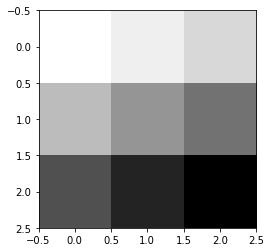

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                    [[4],[5],[6]],
                    [[7],[8],[9]]]], dtype = np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

    Image: 1,3,3,1
    Filter: 2,2,1,1, ( 2x2x1 1개)
    Stride: 1x1
    Padding: VALID


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_imag.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


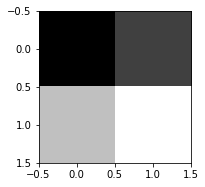

In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("image.shape",image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding ="VALID")
#stride = 1x1일 때, padding값을 'same'을 주면
#input 크기와 output 크기를 갖게 맞추어 padding값을 자동으로 주게 된다.
conv2d_img = conv2d.eval()
print("conv2d_imag.shape", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

Max Pooling

In [ ]:
imgae = np.array([[[[4],[3],
                    [2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],#weight
                      strides = [1,1,1,1], padding='SAME')
print(pool.shape)
print(pool.eval())

실전 이미지에 적용해보기

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("Conv2D_11:0", shape=(1, 14, 14, 5), dtype=float32)


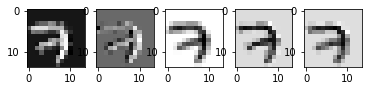

In [88]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

img = mnist.train.images[0].reshape(28,28)#가장 첫번째 데이터를 28,28로 출력하기
plt.imshow(img,cmap='gray')

sess=tf.InteractiveSession()

#28x28x1 사이즈로 reshape해라, 갯수는 너가 알아서 해! (-1)
img = img.reshape(-1,28,28,1)

#3x3x1 filter로 wieght를 줄 것이며, 5개 filter 사용.
w1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))

#stride 2x2에서 padding='same'을 주면, input의 절반 사이즈 (여기서는 14)가 된다
conv2d=tf.nn.conv2d(img,w1,strides=[1,2,2,1], padding='SAME')

print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img=conv2d.eval()
conv2d_img= np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(14,14),cmap='gray')
    



Tensor("MaxPool_9:0", shape=(1, 7, 7, 5), dtype=float32)


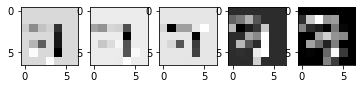

In [90]:
#Max pooling을 해보자
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[
    1,2,2,1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(7,7),cmap='gray')

# 11-2) MNIST 99% with CNN

In [91]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# Conv layer1
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
#    Pool     -> (?, 14, 14, 32)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''

#Conv layer2
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
#    Pool      ->(?, 7, 7, 64)
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''

# Fully Connected(FC,Dense) layer
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Learning started. It takes sometime.
Epoch: 0001 cost = 0.391705905
Epoch: 0002 cost = 0.100289708
Epoch: 0003 cost = 0.076496792
Epoch: 0004 cost = 0.061320314
Epoch: 0005 cost = 0.052941998
Epoch: 0006 cost = 0.047001821
Epoch: 0007 cost = 0.040163770
Epoch: 0008 cost = 0.035363829
Epoch: 0009 cost = 0.031678290
Epoch: 0010 cost = 0.029407677
Epoch: 0011 cost = 0.025139195
Epoch: 0012 cost = 0.023003524
Epoch: 0013 cost = 0.020343913
Epoch: 0014 cost = 0.017449826
Epoch: 0015 cost = 0.015580827
Learning Finished!
Accuracy: 0.9858


# 11-3) CNN class, Layers, Ensemble

강좌로 들어~~~~

https://www.youtube.com/watch?v=c62uTWdhhMw&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=40